In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Cori2020_SelectApps_TwoMonths_JobsData.csv')
df

,jobid,exename,numnodes,numcpus,numtasks,executiontime,start,end,power,memory,appname,taskspercpu,taskspernode,user
0,1,vasp_std,1,256,64,8909,2020-11-03T13:48:31,2020-11-03T16:17:00,289.429,23263800.0,vasp,0.250000,64,user_1
1,2,vasp_std,1,272,1,4498,2020-11-02T05:44:30,2020-11-02T06:59:28,283.234,22576300.0,vasp,0.003676,1,user_1
2,3,vasp,1,272,1,5877,2020-11-02T12:46:12,2020-11-02T14:24:09,280.768,22589000.0,vasp,0.003676,1,user_1
3,4,vasp_std,1,272,1,3775,2020-11-04T00:37:48,2020-11-04T01:40:43,276.237,23236600.0,vasp,0.003676,1,user_1
4,5,vasp_ncl,1,272,1,4384,2020-11-03T06:41:45,2020-11-03T07:54:49,278.221,17640000.0,vasp,0.003676,1,user_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29069,29070,e3sm.exe,9,2448,9,70863,2020-11-01T04:34:46,2020-11-02T00:15:49,202.724,60231800.0,e3sm,0.003676,1,user_666
29070,29071,e3sm.exe,1,272,1,3895,2020-11-17T11:18:12,2020-11-17T12:23:07,116.595,2375680.0,e3sm,0.003676,1,user_667
29071,29072,e3sm.exe,1,272,1,50147,2020-12-03T19:03:37,2020-12-04T08:59:24,271.134,52274400.0,e3sm,0.003676,1,user_668
29072,29073,wrf.exe,1,272,1,14564,2020-11-17T12:21:16,2020-11-17T16:24:00,179.474,68832200.0,wrf,0.003676,1,user_669


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29074 entries, 0 to 29073
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jobid          29074 non-null  int64  
 1   exename        29074 non-null  object 
 2   numnodes       29074 non-null  int64  
 3   numcpus        29074 non-null  int64  
 4   numtasks       29074 non-null  int64  
 5   executiontime  29074 non-null  int64  
 6   start          29074 non-null  object 
 7   end            29074 non-null  object 
 8   power          29074 non-null  float64
 9   memory         29074 non-null  float64
 10  appname        29074 non-null  object 
 11  taskspercpu    29074 non-null  float64
 12  taskspernode   29074 non-null  int64  
 13  user           29074 non-null  object 
dtypes: float64(3), int64(6), object(5)
memory usage: 3.1+ MB


In [ ]:
df.describe()

,jobid,numnodes,numcpus,numtasks,executiontime,power,memory,taskspercpu,taskspernode
count,29074.0000,29074.000000,2.907400e+04,29074.000000,29074.000000,29074.000000,2.907400e+04,29074.000000,29074.000000
mean,14537.5000,23.833494,6.482710e+03,23.835661,10718.879239,215.189434,2.566568e+07,0.003685,1.002167
std,8393.0852,131.705361,3.582386e+04,131.705504,22644.108393,44.341387,1.545994e+07,0.001445,0.369478
min,1.0000,1.000000,2.560000e+02,1.000000,600.000000,54.044100,2.443740e+04,0.003676,1.000000
25%,7269.2500,1.000000,2.720000e+02,1.000000,1393.000000,177.095000,1.375345e+07,0.003676,1.000000
50%,14537.5000,1.000000,2.720000e+02,1.000000,2636.000000,217.479500,2.395255e+07,0.003676,1.000000
75%,21805.7500,4.000000,1.088000e+03,4.000000,8019.000000,253.252500,3.549035e+07,0.003676,1.000000
max,29074.0000,6144.000000,1.671168e+06,6144.000000,172803.000000,304.401000,9.126760e+07,0.250000,64.000000


In [ ]:
df.isnull().sum()

,0
jobid,0
exename,0
numnodes,0
numcpus,0
numtasks,0
executiontime,0
start,0
end,0
power,0
memory,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categories = df['exename']
encoded_labels = label_encoder.fit_transform(categories)

print(encoded_labels)

df['exename'] = encoded_labels

[42 42 26 ...  1 50  7]


In [ ]:
df['exename'].dtype

dtype('int64')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categories = df['appname']
encoded_labels = label_encoder.fit_transform(categories)

print(encoded_labels)

df['appname'] = encoded_labels

[8 8 8 ... 3 9 4]


In [ ]:
df['appname'].dtype

dtype('int64')

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categories = df['user']
encoded_labels = label_encoder.fit_transform(categories)

print(encoded_labels)

df['user'] = encoded_labels

[  0   0   0 ... 510 511 513]


In [ ]:
df['user'].dtype

dtype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29074 entries, 0 to 29073
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   jobid          29074 non-null  int64  
 1   exename        29074 non-null  int64  
 2   numnodes       29074 non-null  int64  
 3   numcpus        29074 non-null  int64  
 4   numtasks       29074 non-null  int64  
 5   executiontime  29074 non-null  int64  
 6   start          29074 non-null  object 
 7   end            29074 non-null  object 
 8   power          29074 non-null  float64
 9   memory         29074 non-null  float64
 10  appname        29074 non-null  int64  
 11  taskspercpu    29074 non-null  float64
 12  taskspernode   29074 non-null  int64  
 13  user           29074 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 3.1+ MB


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.drop(['start','end'],axis=1,inplace=True)

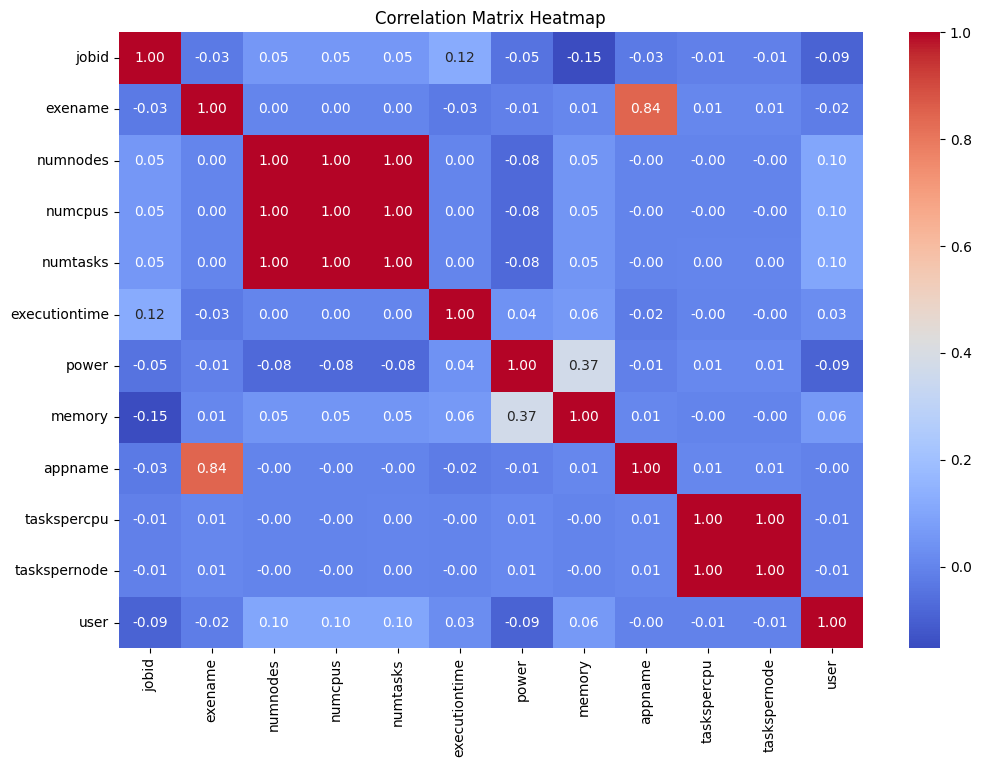

Correlation with target variable (power):
 jobid           -0.048275
exename         -0.012877
numnodes        -0.076057
numcpus         -0.076057
numtasks        -0.076029
executiontime    0.040635
memory           0.372580
appname         -0.012185
taskspercpu      0.009819
taskspernode     0.009819
user            -0.093380
Name: power, dtype: float64
Features to drop due to high correlation: {'exename', 'numcpus', 'numtasks', 'taskspernode', 'appname', 'numnodes', 'taskspercpu'}


In [ ]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Specify the target variable
target = 'power'  # Example: Use 'power' as the target variable

# Correlation with the target variable
if target in correlation_matrix:
    correlation_with_target = correlation_matrix[target].drop(target)
    print(f"Correlation with target variable ({target}):\n", correlation_with_target)

# Set a threshold for dropping features based on inter-feature correlation
threshold = 0.8

# Identify highly correlated features (excluding the target variable)
high_correlation = correlation_matrix.abs() > threshold

# Mask diagonal to ignore self-correlations
np.fill_diagonal(high_correlation.values, False)

# Determine features to drop
features_to_drop = set()
for col in high_correlation.columns:
    if col != target and any(high_correlation[col]):  # Skip target variable
        correlated_features = high_correlation.index[high_correlation[col]].tolist()
        # Keep the feature most correlated with the target and drop the rest
        correlated_with_target = [f for f in correlated_features if f != target]
        if correlated_with_target:
            features_to_drop.update(correlated_with_target)

print("Features to drop due to high correlation:", features_to_drop)

droping the start and end because the execution time exist which is same as end_date(time)-start_date(time)

In [ ]:
df.drop(['taskspercpu','numcpus','numnodes','exename'],axis=1,inplace=True)

In [ ]:
column_names = df.columns.tolist()
print(column_names)

['jobid', 'numtasks', 'executiontime', 'power', 'memory', 'appname', 'taskspernode', 'user']


In [ ]:
from sklearn.ensemble import IsolationForest
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

iso_forest = IsolationForest(contamination=0.05, random_state=42)

df['Anomaly'] = iso_forest.fit_predict(df[numeric_columns])

outliers = df[df['Anomaly'] == -1]
inliers = df[df['Anomaly'] == 1]

df_cleaned = inliers.drop(columns=['Anomaly'])

print("Outliers detected:")
outliers

Outliers detected:


,jobid,numtasks,executiontime,power,memory,appname,taskspernode,user,Anomaly
24,25,8,39106,271.210,30152600.0,1,1,0,-1
64,65,1,54818,187.102,9578650.0,0,1,0,-1
104,105,1,155059,244.980,4251190.0,8,1,107,-1
105,106,1,171058,254.842,8040140.0,8,1,107,-1
106,107,1,150405,176.498,3152560.0,8,1,107,-1
...,...,...,...,...,...,...,...,...,...
29069,29070,9,70863,202.724,60231800.0,3,1,508,-1
29070,29071,1,3895,116.595,2375680.0,3,1,509,-1
29071,29072,1,50147,271.134,52274400.0,3,1,510,-1
29072,29073,1,14564,179.474,68832200.0,9,1,511,-1


In [ ]:
df.drop(['Anomaly'],axis=1,inplace=False)

,jobid,numtasks,executiontime,power,memory,appname,taskspernode,user
0,1,64,8909,289.429,23263800.0,8,64,0
1,2,1,4498,283.234,22576300.0,8,1,0
2,3,1,5877,280.768,22589000.0,8,1,0
3,4,1,3775,276.237,23236600.0,8,1,0
4,5,1,4384,278.221,17640000.0,8,1,0
...,...,...,...,...,...,...,...,...
29069,29070,9,70863,202.724,60231800.0,3,1,508
29070,29071,1,3895,116.595,2375680.0,3,1,509
29071,29072,1,50147,271.134,52274400.0,3,1,510
29072,29073,1,14564,179.474,68832200.0,9,1,511


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
target_column = 'power'
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Kernel R² Score: {r2_linear:.2f}")
print(f"Linear Kernel Mean Squared Error: {mse_linear:.2f}")


Linear Kernel R² Score: 0.15
Linear Kernel Mean Squared Error: 1670.25


In [ ]:
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
svr_poly.fit(X_train, y_train)
y_pred_poly = svr_poly.predict(X_test)
r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Kernel R² Score: {r2_poly:.2f}")
print(f"Polynomial Kernel Mean Squared Error: {mse_poly:.2f}")


Polynomial Kernel R² Score: 0.20
Polynomial Kernel Mean Squared Error: 1560.97


In [ ]:
svr_rbf = SVR(kernel='rbf', C=1.0, gamma=0.1, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)
r2_rbf = r2_score(y_test, y_pred_rbf)
print(f"RBF Kernel R² Score: {r2_rbf:.2f}")

RBF Kernel R² Score: 0.35
RBF Kernel Mean Squared Error: 1267.24
